# Exploratory data analysis

In [43]:
# Data Management/Investigation
import pandas as pd
from pandas.api.types import CategoricalDtype # Ordering categories
import numpy as np
import missingno as miss

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

# Splits
from sklearn.model_selection import train_test_split


In [44]:
df = pd.read_csv("../07_data_staged/clean_data.csv")

In [45]:
df.describe()

,Week,Season,Game_TO,Game_yds,Game_pts_diff,Game_yards_diff,Time_rest_hours,Miles_traveled,Division_Rival,Conference_Rival,...,Time_diff,Same_surface,Attendance,Capacity,Attendance_pct,Season_SRS,Season_SoS,Season_offense,Season_defense,Win
count,13944.000000,13944.000000,13944.000000,13944.000000,13944.000000,13944.000000,13944.000000,13944.000000,13944.000000,13944.000000,...,13944.000000,13944.000000,13944.000000,13944.000000,13944.000000,13944.000000,13944.000000,13944.000000,13944.000000,13944.000000
mean,8.143001,2005.764487,1.695927,329.687034,0.000000,0.000000,191.632254,496.142211,0.416523,0.336345,...,0.492326,0.743044,65623.427567,70331.893861,93.446660,-0.000330,0.000925,-0.000380,-0.001649,0.500000
std,4.998005,7.990395,1.388695,84.442904,14.803002,120.257193,65.955250,707.072484,0.493000,0.472476,...,0.903712,0.436971,10266.107844,8306.323124,11.015742,6.062337,1.584652,4.215893,3.480400,0.500018
min,0.000000,1992.000000,0.000000,26.000000,-59.000000,-443.000000,88.166667,0.000000,0.000000,0.000000,...,0.000000,0.000000,15131.000000,30000.000000,25.231370,-17.400000,-5.900000,-12.300000,-9.800000,0.000000
25%,4.000000,1999.000000,1.000000,272.000000,-9.000000,-79.000000,165.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,61024.250000,65515.000000,92.356949,-4.100000,-1.100000,-2.900000,-2.300000,0.000000
50%,8.000000,2006.000000,1.000000,329.000000,0.000000,0.000000,168.000000,85.046898,0.000000,0.000000,...,0.000000,1.000000,66671.000000,69084.000000,97.500615,-0.100000,0.000000,-0.100000,0.100000,0.500000
75%,13.000000,2013.000000,3.000000,386.000000,9.000000,79.000000,175.283333,826.816695,1.000000,1.000000,...,1.000000,1.000000,71668.500000,75000.000000,99.837941,4.300000,1.100000,2.600000,2.500000,1.000000
max,17.000000,2019.000000,8.000000,653.000000,59.000000,443.000000,504.950000,5469.410150,1.000000,1.000000,...,8.000000,1.000000,105121.000000,105000.000000,118.216926,20.100000,4.300000,15.900000,9.800000,1.000000


In [46]:
df.columns

Index(['Week', 'Season', 'Team_A', 'Team_B', 'Game_TO', 'Game_yds',
       'Game_pts_diff', 'Game_yards_diff', 'Time_rest_hours', 'Miles_traveled',
       'Division_Rival', 'Conference_Rival', 'Grass', 'Home', 'Time_diff',
       'Same_surface', 'Attendance', 'Capacity', 'Attendance_pct',
       'Season_SRS', 'Season_SoS', 'Season_offense', 'Season_defense', 'Win'],
      dtype='object')

#### Drop Week, Season, Team_A and Team_B.

In [47]:
df = df.drop(columns=["Week","Season","Team_A","Team_B"])

#### Convert categorical variables to category

In [48]:
for col in ['Division_Rival','Conference_Rival', 'Grass', 'Home','Same_surface','Win']:
    df[col] = df[col].astype('category')

### Missing no plot
<code>conda install -c conda-forge missingno</code>

<AxesSubplot:>

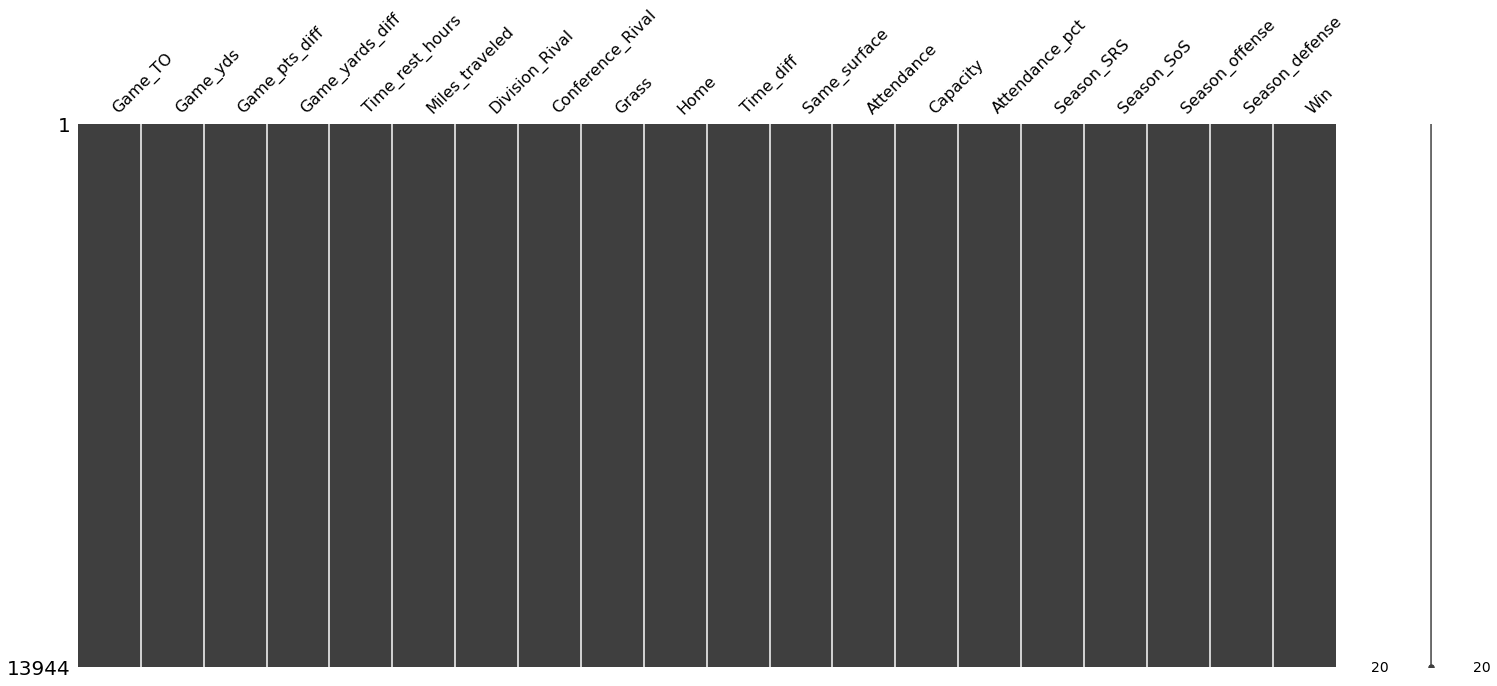

In [49]:
miss.matrix(df)

# Split the dataset

Before doing exploratory data analysis, I want to split the dataset into a training & test set to ensure there's no leakage when training the model

In [50]:
y = df['Win']
X = df.drop(columns="Win")

In [51]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = .25,random_state=42)
train_X.shape

(10458, 19)

## Outcome

Now that the data is split, I can investigate the outcome variable to see if the outcome variable is a balanced class.

Note: this is generally good practice, however, with this particular dataset, because each dyad consists of 2 teams in a football game, there is always a winner and always a loser (I've dropped all tied games), therefore the data should be perfectly balanced. The train/ test split probably added some imbalance to the outcome variable but it shouldn't be much.

<AxesSubplot:xlabel='Win', ylabel='count'>

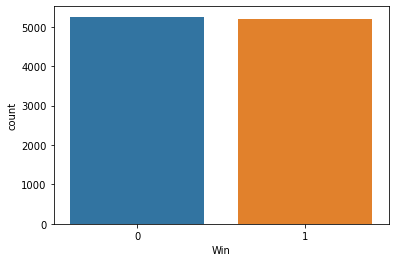

In [52]:
sns.countplot(x = train_y)

In [53]:
train_y.value_counts()

0    5257
1    5201
Name: Win, dtype: int64

### This is a classification problem with a balanced class

# Input features

### Continuous variables
Use <code>.select_dtypes(include=["int","float"])</code> to pick variables based on data type

#### Pandas

array([[<AxesSubplot:title={'center':'Game_TO'}>,
        <AxesSubplot:title={'center':'Game_yds'}>,
        <AxesSubplot:title={'center':'Game_pts_diff'}>,
        <AxesSubplot:title={'center':'Game_yards_diff'}>],
       [<AxesSubplot:title={'center':'Time_rest_hours'}>,
        <AxesSubplot:title={'center':'Miles_traveled'}>,
        <AxesSubplot:title={'center':'Time_diff'}>,
        <AxesSubplot:title={'center':'Attendance'}>],
       [<AxesSubplot:title={'center':'Capacity'}>,
        <AxesSubplot:title={'center':'Attendance_pct'}>,
        <AxesSubplot:title={'center':'Season_SRS'}>,
        <AxesSubplot:title={'center':'Season_SoS'}>],
       [<AxesSubplot:title={'center':'Season_offense'}>,
        <AxesSubplot:title={'center':'Season_defense'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

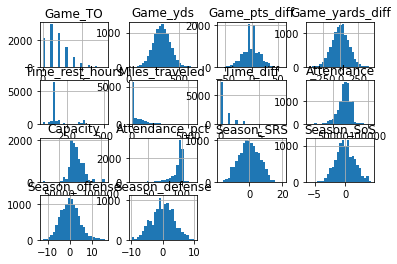

In [54]:
# Pandas
train_X.select_dtypes(include=["int","float"]).hist(bins=25)

#### Seaborn

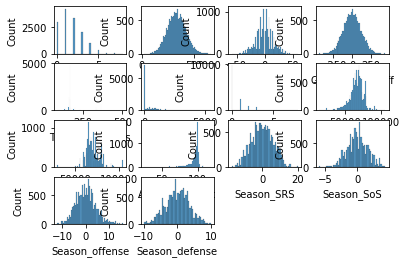

In [55]:
# Seaborn 
n_cols = 4
n_rows = 4

for i, column in enumerate(train_X.select_dtypes(include=["int","float"]), 1):
    plt.subplot(n_cols,n_rows,i)
    sns.histplot(df[column])

#### Plotnine
<code>conda install -c conda-forge plotnine</code>

/Users/chau/miniforge3/envs/text-data-class/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/chau/miniforge3/envs/text-data-class/lib/python3.9/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


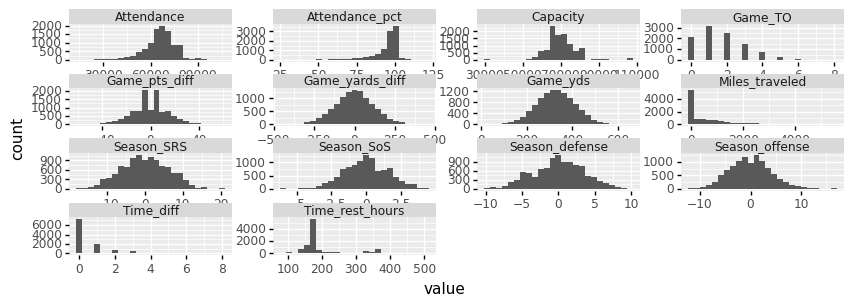

<ggplot: (727545540)>

In [56]:
# Plotnine
d = train_X.select_dtypes(include=["int","float"]).melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)



### Categorical variables

/Users/chau/miniforge3/envs/text-data-class/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


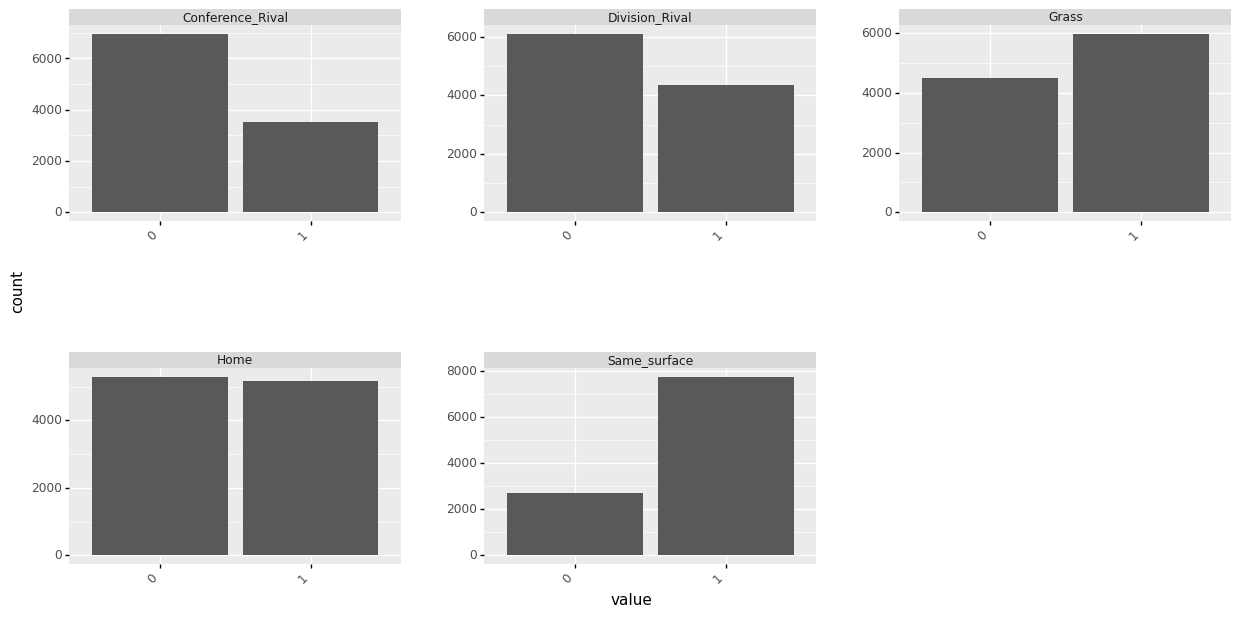

<ggplot: (728604642)>

In [60]:
d = train_X.select_dtypes(include="category").melt()
(
    ggplot(d,aes(x="value")) +
    geom_bar() +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(15,7),
          subplots_adjust={'wspace':0.25,
                           'hspace':0.75},
         axis_text_x=element_text(rotation=45, hjust=1))
)